In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df['is_canceled'].value_counts() #target variable

0    75166
1    44224
Name: is_canceled, dtype: int64

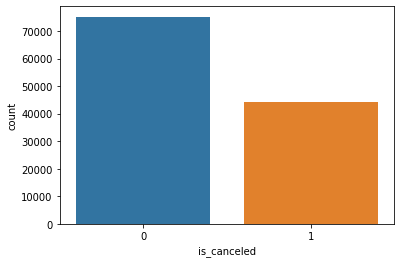

In [5]:
sns.countplot(df['is_canceled'])

In [6]:
df.shape

(119390, 32)

# Missing Values

In [7]:
df.isnull().sum()*100/df.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
df.drop('company',axis=1, inplace=True)

In [9]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [10]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [11]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [12]:
df[df['children']==10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,2,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12


In [13]:
df.drop([328],axis=0,inplace=True) # outliners values delete. 

In [14]:
df['children'].unique()

array([ 0.,  1.,  2.,  3., nan])

# Fillna Values

In [15]:
df['country'].replace(np.nan,"Undefined",inplace=True)
df['agent'].replace(np.nan , 0 , inplace=True)
df['children'].replace(np.nan , 0 , inplace=True)

In [16]:
df.isnull().sum()*100/df.shape[0]

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [17]:
df=df.to_csv('Clear_Hotel_Booking.csv',encoding='utf8')

# EDA 

In [18]:
import pandas as dp 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 

In [19]:
df= pd.read_csv('Clear_Hotel_Booking.csv')
df.drop('Unnamed: 0',axis=1 , inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119389.0,0.370411,0.482917,0.00,0.00,0.00,1.0,1.0
lead_time,119389.0,104.011827,106.863450,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119389.0,2016.156564,0.707471,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119389.0,27.165158,13.605194,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119389.0,15.798273,8.780859,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119389.0,0.927573,0.998578,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119389.0,2.500239,1.908170,0.00,1.00,2.00,3.0,50.0
adults,119389.0,1.856402,0.579263,0.00,2.00,2.00,2.0,55.0
children,119389.0,0.103804,0.397526,0.00,0.00,0.00,0.0,3.0
babies,119389.0,0.007949,0.097437,0.00,0.00,0.00,0.0,10.0


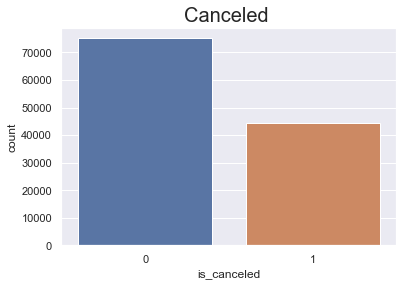

In [21]:
sns.set(style = "darkgrid")
plt.title("Canceled ", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", data = df)

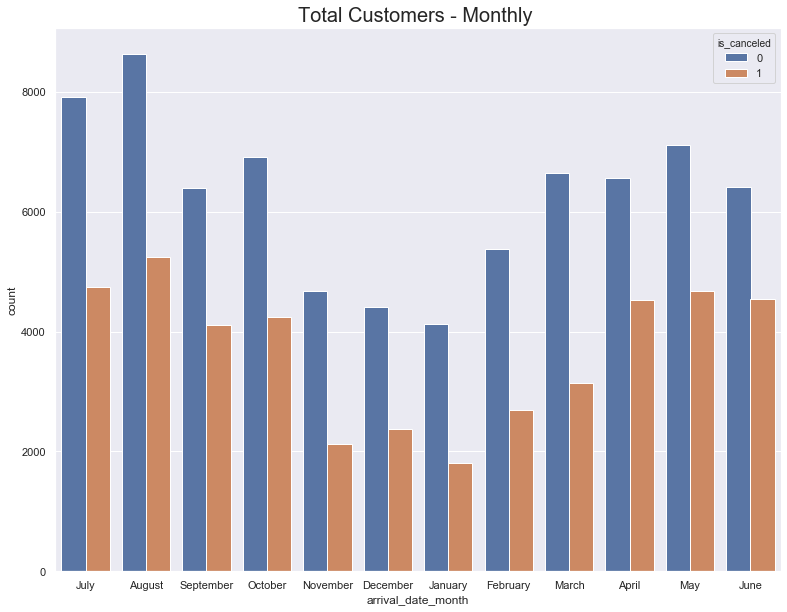

In [23]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'is_canceled', data = df)

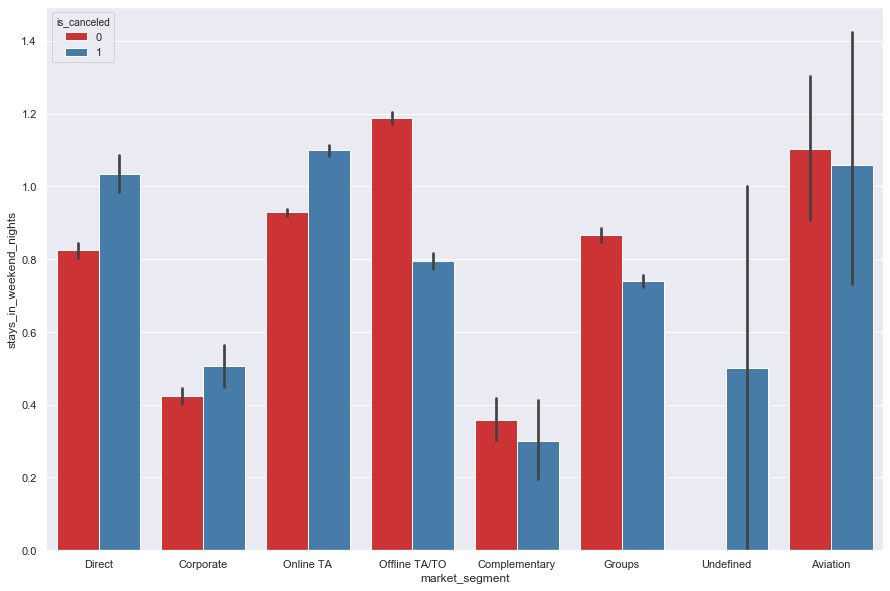

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x = "market_segment", y = "stays_in_weekend_nights", data = df, hue = "is_canceled", palette = 'Set1');

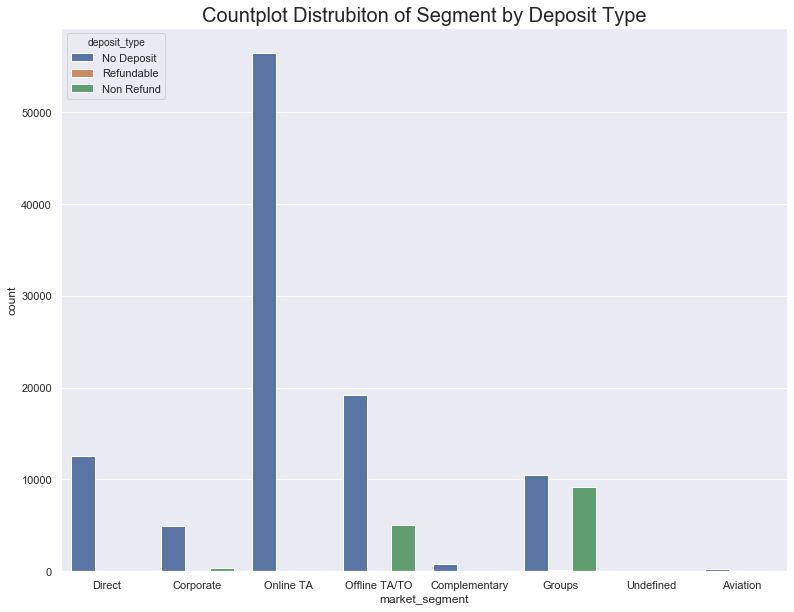

In [24]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

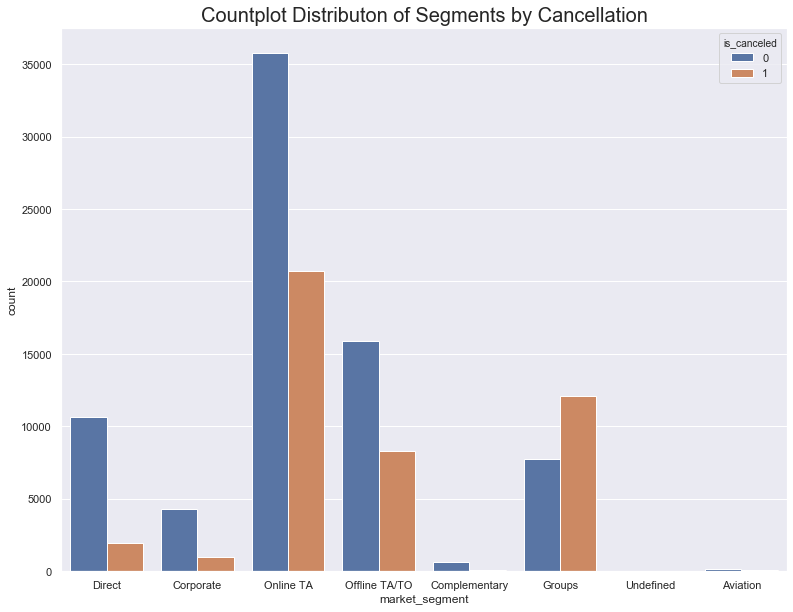

In [25]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

In [13]:
df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,0.136549,0.075376,0.035249,0.001271,-0.001867,-0.186568,-2.339904e-01,-0.013180,-0.044032,...,0.285146,-0.072791,-0.166461,-0.651057,0.072431,-0.039832,0.096728,-0.218878,-0.043384,0.133116
is_canceled,0.136549,1.000000,0.293131,0.016678,0.008147,-0.006125,-0.001825,2.472349e-02,0.060015,0.004777,...,0.197203,-0.144416,-0.477918,-0.046523,0.054188,-0.023731,0.047550,-0.195496,-0.234666,0.978452
lead_time,0.075376,0.293131,1.000000,0.040136,0.126871,0.002266,0.085686,1.658253e-01,0.119520,-0.037615,...,0.178238,0.000159,-0.380233,-0.012642,0.170084,0.068570,-0.063075,-0.116452,-0.095710,0.304075
arrival_date_year,0.035249,0.016678,0.040136,1.000000,-0.540566,-0.000227,0.021541,3.093946e-02,0.029639,0.055119,...,-0.027152,0.030911,0.065742,0.056456,-0.056499,-0.171688,0.197591,-0.013688,0.108540,0.017536
arrival_date_week_number,0.001271,0.008147,0.126871,-0.540566,1.000000,0.066810,0.018205,1.555487e-02,0.025909,0.005501,...,0.005761,0.005505,-0.005847,-0.018243,0.022933,0.090339,0.075790,0.001921,0.026149,0.013113
arrival_date_day_of_month,-0.001867,-0.006125,0.002266,-0.000227,0.066810,1.000000,-0.016344,-2.816113e-02,-0.001565,0.014681,...,-0.012399,0.010623,0.004980,0.000200,0.022727,-0.012015,0.030248,0.008683,0.003064,-0.009027
stays_in_weekend_nights,-0.186568,-0.001825,0.085686,0.021541,0.018205,-0.016344,1.000000,4.989196e-01,0.091868,0.045273,...,-0.088068,0.063216,0.113532,0.161450,-0.054150,0.101917,0.049328,-0.018548,0.072660,-0.005318
stays_in_week_nights,-0.233990,0.024723,0.165825,0.030939,0.015555,-0.028161,0.498920,1.000000e+00,0.092973,0.043501,...,-0.103047,0.096129,0.078853,0.195169,-0.002016,0.132931,0.065221,-0.024853,0.068178,0.023683
adults,-0.013180,0.060015,0.119520,0.029639,0.025909,-0.001565,0.091868,9.297339e-02,1.000000,0.030468,...,-0.146503,-0.051680,0.028479,0.024995,-0.008283,0.020480,0.230640,0.014785,0.122883,0.067410
children,-0.044032,0.004777,-0.037615,0.055119,0.005501,0.014681,0.045273,4.350126e-02,0.030468,1.000000,...,-0.236612,0.048511,0.097138,0.050842,-0.033330,-0.019264,0.325566,0.056454,0.081835,0.004463


# Lojistic Regresyon

# Model

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Clear_Hotel_Booking.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Encoding Process

In [2]:
df['hotel'] = pd.get_dummies(df['hotel'],drop_first=True)
df['meal'] = pd.get_dummies(df['meal'],drop_first=True)
df['market_segment'] = pd.get_dummies(df['market_segment'],drop_first=True)
df['distribution_channel'] = pd.get_dummies(df['distribution_channel'],drop_first=True)
df['deposit_type'] = pd.get_dummies(df['deposit_type'],drop_first=True)
df['customer_type'] = pd.get_dummies(df['customer_type'],drop_first=True)
df['assigned_room_type'] = pd.get_dummies(df['assigned_room_type'],drop_first=True)
df['country'] = pd.get_dummies(df['country'],drop_first=True)

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn import tree
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# # Stats Model 

In [4]:
X = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)
y = df['is_canceled']

In [5]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)

loj = LogisticRegression(solver = "liblinear")
loj = sm.Logit(y_train,X_train)
loj_model = loj.fit()
loj_model.summary()


Optimization terminated successfully.
         Current function value: 0.482490
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                95511
Model:                          Logit   Df Residuals:                    95487
Method:                           MLE   Df Model:                           23
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:                  0.2680
Time:                        15:11:55   Log-Likelihood:                -46083.
converged:                       True   LL-Null:                       -62958.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
hotel                             -0.3564      0.026    -13.972      0.000      -0.406      -0.306
lead_time                          0.0025   9.14e-05     27.535      0.000       0.002       0.003
arrival_date_week_number          -0.0141      0.001    -23.828      0.000      -0.015      -0.013
arrival_date_day_of_month         -0.0134      0.001    -15.434      0.000      -0.015      -0.012
stays_in_weekend_nights            0.0308      0.009      3.311      0.001       0.013       0.049
stays_in_week_nights               0.0193      0.005      3.935      0.000       0.010       0.029
adults                            -0.2380      0.014    -17.350      0.000      -0.265      -0.211
children                           0.2261      0.020     11.480      0.000       0.188       0.265
babies                             0.1212      0.093      1.308      0.191      -0.060       0.303
meal                               0.4654      0.109      4.275      0.000       0.252       0.679
country                            1.2511      0.132      9.498      0.000       0.993       1.509
market_segment                     0.2271      0.139      1.636      0.102      -0.045       0.499
distribution_channel              -0.8847      0.030    -29.633      0.000      -0.943      -0.826
is_repeated_guest                 -1.0461      0.085    -12.343      0.000      -1.212      -0.880
previous_cancellations             2.4352      0.063     38.814      0.000       2.312       2.558
previous_bookings_not_canceled    -0.4912      0.026    -18.543      0.000      -0.543      -0.439
assigned_room_type                -0.4865      0.063     -7.726      0.000      -0.610      -0.363
booking_changes                   -0.5233      0.017    -30.350      0.000      -0.557      -0.490
deposit_type                       5.2151      0.125     41.649      0.000       4.970       5.461
agent                              0.0004      0.000      3.341      0.001       0.000       0.001
days_in_waiting_list              -0.0050      0.001     -9.210      0.000      -0.006      -0.004
customer_type                     -0.8163      0.161     -5.063      0.000      -1.132      -0.500
adr                                0.0039      0.000     19.993      0.000       0.004       0.004
total_of_special_requests         -0.5028      0.011    -44.105      0.000      -0.525      -0.480
==================================================================================================
"""

# Model with Func.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Hyperparameter

In [7]:
# Create hyperparameter options
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

In [8]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X, y)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.7502125073412003


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logistic = LogisticRegression(solver='liblinear',penalty='l1',C=0.0001)
    logistic.fit(X_train, y_train)
    
    prediction_train=logistic.predict(X_train)
    prediction_test=logistic.predict(X_test)
    
    prediction_test_prob = logistic.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [10]:
create_model(X,y,tip='Logistic_Regr.')

Accuracy_Train     0.750196
Precision_Train    0.993827
Recall_Train       0.327633
F1 Score_Train     0.492804
Accuracy_Test      0.750272
Precision_Test     0.992818
Recall_Test        0.328208
F1 Score_Test      0.493330
AUC Score          0.663406
Name: Logistic_Regr., dtype: float64

In [11]:
metrics=pd.DataFrame()

In [12]:
metrics=metrics.append(create_model(X,y,tip='Logistic_Regr.'))

# Cross Validate

In [13]:
from sklearn.model_selection import cross_validate, cross_val_score

lrm = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.69578692 0.68255298 0.79696792 0.67727615 0.75115169 0.76815479
 0.74863891 0.76840606 0.76430187 0.80490869]
--------------------------------------------------
Train Scores          : 
[0.78689623 0.79031177 0.77431363 0.78220568 0.779302   0.78005584
 0.78045603 0.77743136 0.77919032 0.76925296]


In [14]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.7458145984479012
Mean of Train Sets :  0.7799415828264664


In [15]:
df['is_canceled'].value_counts()

0    75166
1    44223
Name: is_canceled, dtype: int64

In [16]:
print("Percentage of canceled Customer:%",round(df.is_canceled.value_counts()[1]/df.shape[0]*100,2))
print("Percentage of Not canceled(No)  Customer:%",round(df.is_canceled.value_counts()[0]/df.shape[0]*100,2))

Percentage of canceled Customer:% 37.04
Percentage of Not canceled(No)  Customer:% 62.96


# Resampling

In [17]:
from sklearn.utils import resample
canceled_customer=df[df.is_canceled==1]
not_canceled_customer=df[df.is_canceled==0]
canceled_customer_resample= resample(canceled_customer,
                                     replace = True,
                                     n_samples = len(not_canceled_customer),
                                     random_state = 111)

resample_df = pd.concat([not_canceled_customer, canceled_customer_resample])
resample_df.is_canceled.value_counts()

1    75166
0    75166
Name: is_canceled, dtype: int64

In [18]:
X_r = resample_df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)
y_r = resample_df['is_canceled']
#metrics=pd.DataFrame()
metrics=metrics.append(create_model(X,y,'Resampled_Logistic'))

# Logistic Regression with SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
y_s = df['is_canceled']
X_s = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)

sm = SMOTE(random_state=111)
X_smote, y_smote = sm.fit_sample(X_s, y_s)
metrics=metrics.append(create_model(X_smote,y_smote,'L.Regression_with_SMOTE'))

# Logistic Regression with ADASYN

In [20]:
from imblearn.over_sampling import ADASYN
y_a = df['is_canceled']
X_a = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)

ad = ADASYN(random_state=111)
X_adasyn, y_adasyn = ad.fit_sample(X_a, y_a)
metrics=metrics.append(create_model(X_adasyn,y_adasyn,'L.Regression_with_ADASYN'))

In [21]:
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.663406,0.750272,0.750196,0.493330,0.492804,0.992818,0.993827,0.328208,0.327633
Resampled_Logistic,0.663406,0.750272,0.750196,0.493330,0.492804,0.992818,0.993827,0.328208,0.327633
L.Regression_with_SMOTE,0.700763,0.647487,0.647429,0.640748,0.640880,0.653214,0.653014,0.628750,0.629189
L.Regression_with_ADASYN,0.657332,0.616757,0.616846,0.612029,0.612951,0.612092,0.611687,0.611967,0.614220


# Conclusion

 Auc Score bize doğru pozitif oranı ve yanlış pozitif oranı hakkında bilgi verir. AUC Score 'ın yüksek olmasını isteriz yüksek bir orana sahip olması bize modelimizin tahminlerinin doğru olması hakkında bilgi verir. Burada en yüksek AUC Score değeri Smote 'ye ait. 
 
Acuracy Score bize ortaya koyduğumuz katsayıların (coeff) ve sabit sayı(bias) ile modelimizin ne kadarını açıklayabildiğimizi gösterir.Burada StandarScale edilmiş ve Resample uygulanmış hali diğerlerine oranlar daha yüksek görünüyor. Bu bize Accuracy Test: test için ayırdığımız verinin ne kadarını açıkladığımızı gösteriyor(%75 açıklanabilmiş) keza Accuracy Train de aynı şekilde verinin %75 'ini açıklayabildiğimizi gösteriyor.

F1 Score bize dengesiz veri ile çalışırken kolaylık sunar precision ve recall harmonşk ortalamasıdır. Burada Smote uygulanmı verinin daha dengeli oldugunu bize açıklıyor. 

Precision bize 1 olarak tahmin edilenlerin gerçekte ne kadarı 1 oldugu yüzdesini veriyor. Örnegin elimizde 100 adet veri var ve bunların hepsi 1 olsun. Modellediğimizde hepsini, model 5 tanesini 0 olarak tahmin etsin bu haliyle bizim precision değerimiz 0.95 olur. Eğer buradaki duruma uygularsak. 1 değeri taşıyan verilern neredeyse hepsini doğru tahmim edilmiş Logistic_reg ve Resample_reg de.Yani gerçekte 1 olanların  0.99 'unu yine bir tahmin ettik ve precision değerimiz %1. %1 yanılma durumumuz var. Örneğe geri dönersek, 100 adet 1 'den oluşan verimizde model kurup tahmin ettiğimizde sadece bir adet 0 olarak tahmin ettiğimiz veri var demektir. 



Recall bize gerçekten 1 olarak tahmin edilenlerin gerçekte ne kadarı doğru tahmin edilmiş onun bilgisini veriyor. Tabloya baktığımızda precision değeri sizi yanıltmasın. Precision değeri 0.99 olmasına rağma recall değer : 0.32. yani Bu 0.99 olarak verilen oranın sadece 0.32 'si gerçekte doğru demektir. Gerçekten doğru olarak bilme oranı %32 ' lik bir başarıya sahiptir. Onun yerine Smote daha tutarlı bir oran sergilemiş. precision değeri 0.65 ve recall değeri 0.62. yani %65'lik bir dilimin doğru olarak tahmin edilmiş oranı %62'dir. Bu daha güvenilir ve yüksek bir orandır. 

# The Best 

In [59]:
metrics.iloc[[2], :]

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
L.Regression_with_SMOTE,0.700763,0.647487,0.647429,0.640748,0.64088,0.653214,0.653014,0.62875,0.629189
